<a href="https://colab.research.google.com/github/HafidzSetyawan/PCVK_MuhammadHafidzSetyawan_2024/blob/main/Praktikum_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : MUHAMMAD HAFIDZ SETYAWAN

NIM : 244107027013

MATKUL : PENGOLAHAN CITRA DAN VISI KOMPUTER

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

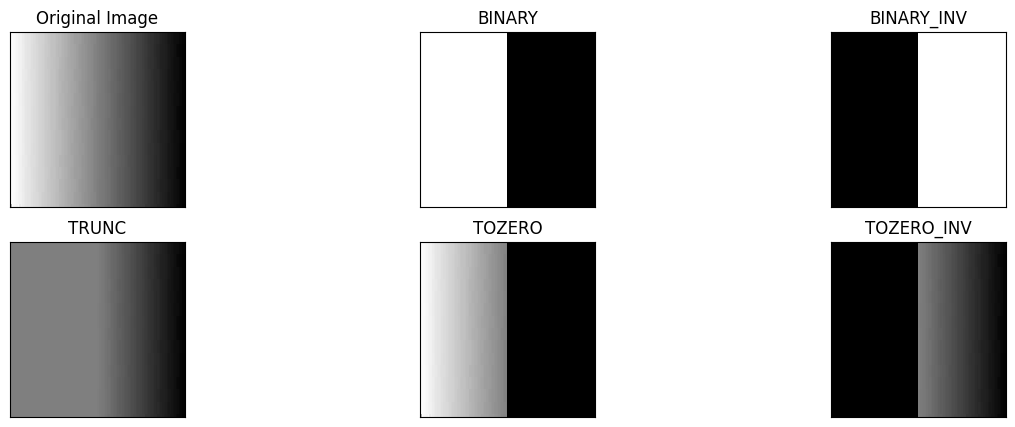

In [ ]:
#Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
#threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
#atas.

filename = ('/content/drive/MyDrive/PCVK_2024/gradient.jpeg')
img = cv.imread(filename)
thresh = 127

ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)

ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)

ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)

ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)

ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

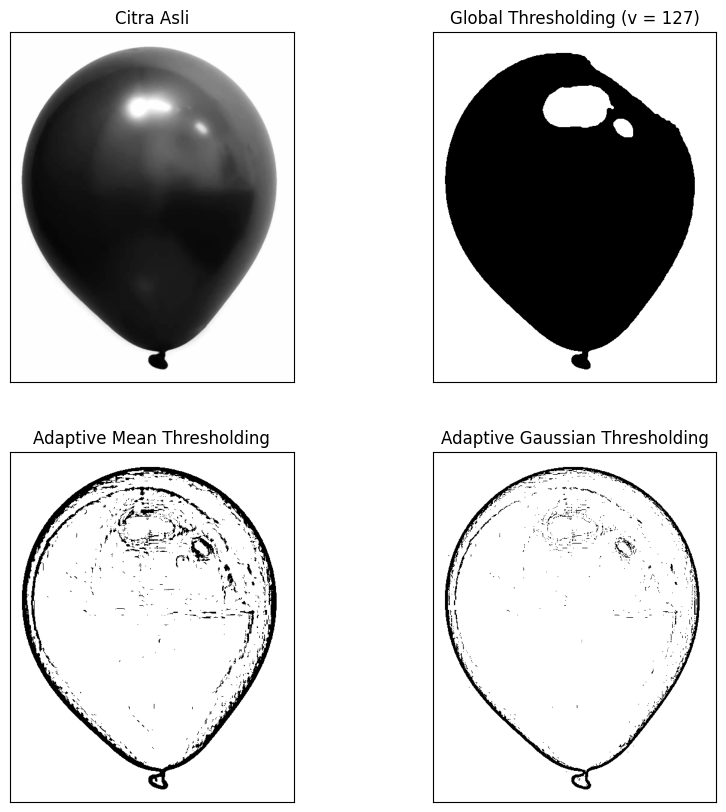

In [ ]:
#Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
#saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
#balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

filename = ('/content/drive/MyDrive/PCVK_2024/ballon.jpeg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)
thresh = 127
ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
 plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

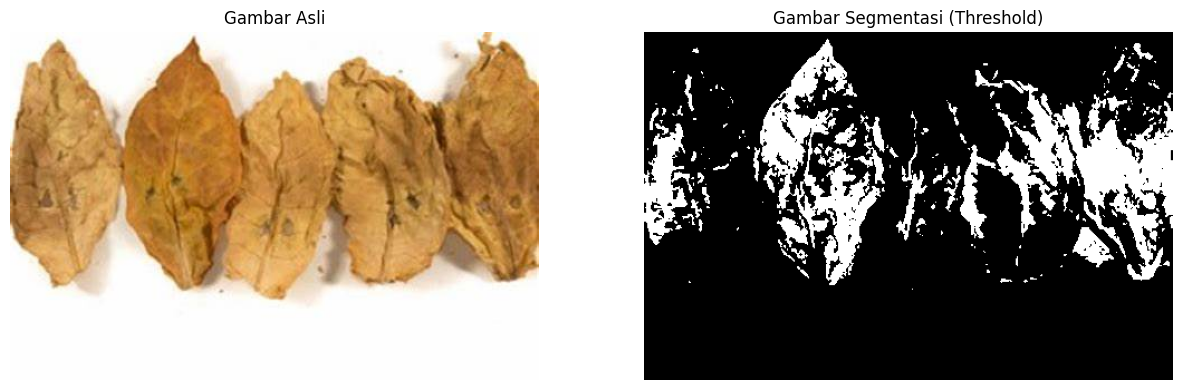

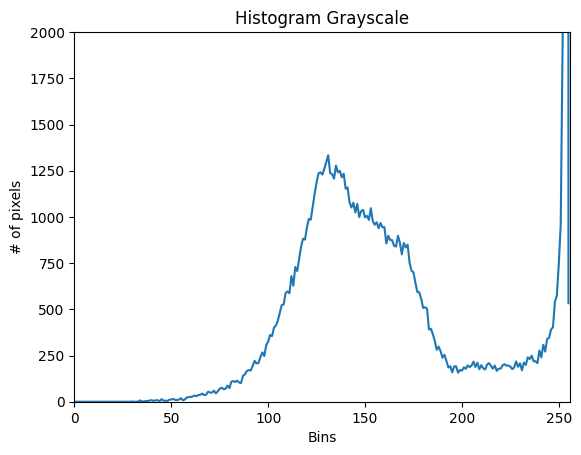

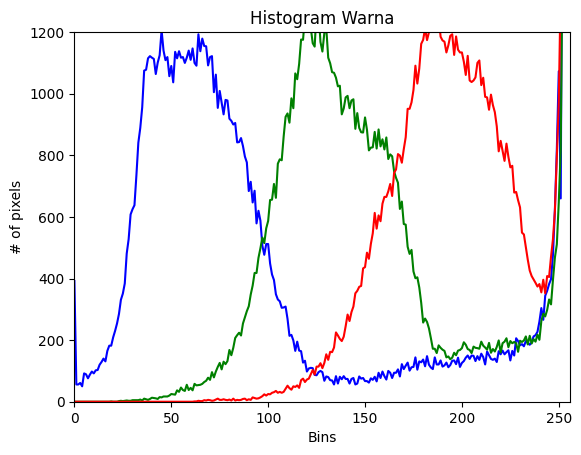

In [ ]:
#Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
#saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.

import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/PCVK_2024/daun.jpeg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

_, thresh = cv.threshold(gray, 128, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))  # Mengubah dari BGR ke RGB untuk tampilan yang benar di Matplotlib
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Gambar Segmentasi (Threshold)')
plt.axis('off')
plt.show()

hist_gray = cv.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title('Histogram Grayscale')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(hist_gray)
plt.xlim([0, 256])
plt.ylim([0, 2000])
plt.show()

chans = cv.split(img)
colors = ('b', 'g', 'r')

plt.figure()
plt.title('Histogram Warna')
plt.xlabel('Bins')
plt.ylabel('# of pixels')

for (chan, color) in zip(chans, colors):
    hist = cv.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.ylim([0, 1200])

plt.show()


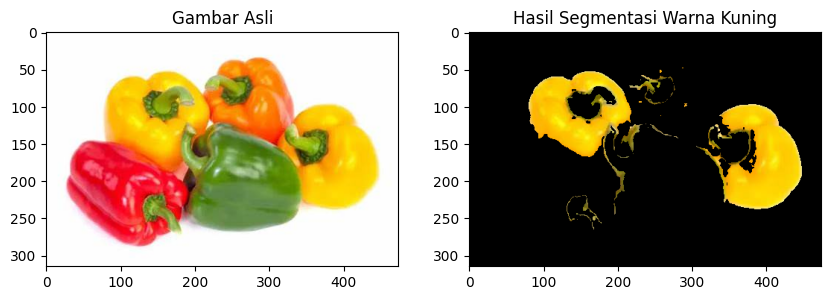

In [11]:
#Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
#kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
#warna tertentu saja)

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
image = cv.imread('/content/drive/MyDrive/PCVK_2024/buah.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Konversi ke HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Rentang warna untuk kuning
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Masking untuk warna kuning
mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
result = cv2.bitwise_and(image, image, mask=mask)

# Plot hasilnya
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Gambar Asli")

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title("Hasil Segmentasi Warna Kuning")

plt.show()

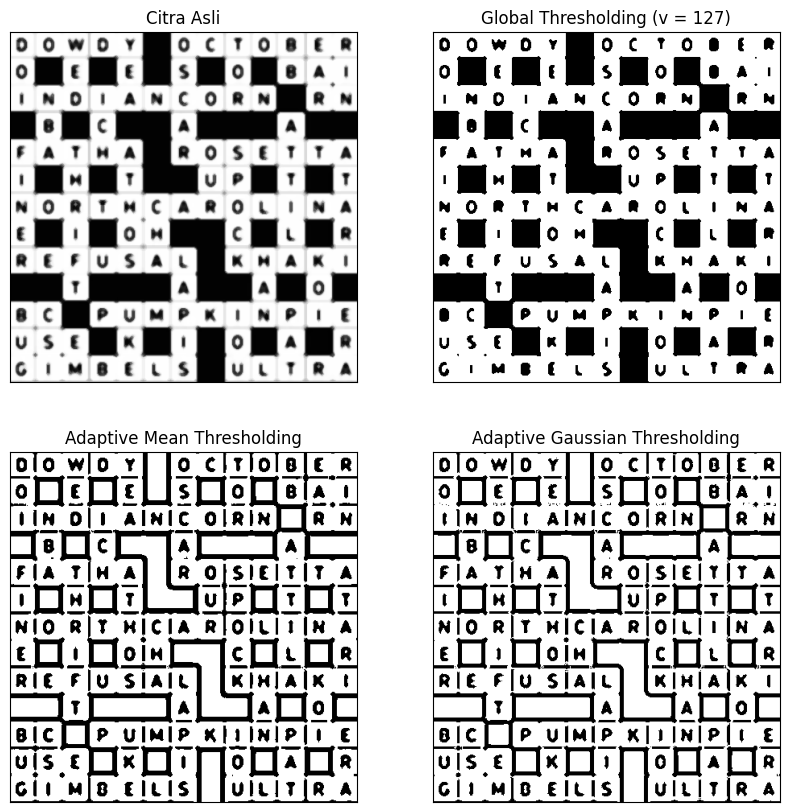

In [16]:
#Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
#pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
#dan hasil image di modul ini.

filename = ('/content/drive/MyDrive/PCVK_2024/crossword3.png')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)
thresh = 127
ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
 plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()